<a href="https://www.kaggle.com/code/tarikemre/sentiment-analysis-on-imdb-reviews?scriptVersionId=167048764" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movie-ratings-sentiment-analysis/movie.csv


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import  confusion_matrix


In [3]:
df = pd.read_csv("/kaggle/input/imdb-movie-ratings-sentiment-analysis/movie.csv")

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
df['Processed_Review'] = df['text'].str.lower()

In [7]:
df

,text,label,Processed_Review
0,I grew up (b. 1965) watching and loving the Th...,0,i grew up (b. 1965) watching and loving the th...
1,"When I put this movie in my DVD player, and sa...",0,"when i put this movie in my dvd player, and sa..."
2,Why do people who do not know what a particula...,0,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,im a die hard dads army fan and nothing will e...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,"""western union"" is something of a forgotten cl..."
39996,This movie is an incredible piece of work. It ...,1,this movie is an incredible piece of work. it ...
39997,My wife and I watched this movie because we pl...,0,my wife and i watched this movie because we pl...
39998,"When I first watched Flatliners, I was amazed....",1,"when i first watched flatliners, i was amazed...."


In [8]:
df.isnull().sum()

text                0
label               0
Processed_Review    0
dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def clean_text(text):
    text = text.lower() # to lower the sentences
    text = re.sub(r'[^\w\s]', '', text) # removing punctuation marks
    text = re.sub(r'\d+', '', text) # removing numbers
    tokens = word_tokenize(text) # tokenization
    tokens = [word for word in tokens if word not in stop_words] # extract the  stopping words
    text = ' '.join(tokens) # join clear text
    return text

In [13]:
df['Cleaned_Review'] = df['text'].apply(clean_text)

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [15]:
X = tfidf_vectorizer.fit_transform(df['Cleaned_Review']).toarray()
y = df['label'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [20]:
accuracy

0.849625

***Prediction Function***

In [21]:
def predict_sentiment(sentence, model, tfidf_vectorizer):
    cleaned_sentence = clean_text(sentence) # clear sentence
    sentence_vectorized = tfidf_vectorizer.transform([cleaned_sentence]).toarray() # vectorize the sentence
    prediction = model.predict(sentence_vectorized) # to predict with use model
    return prediction

***Prediton on a two sample sentence***

In [22]:
# Örnek bir cümle
sentenceGood = "The cinematography in the film was absolutely stunning, capturing the essence of each scene with breathtaking beauty."
# Duygu tahminini yapma
prediction = predict_sentiment(sentenceGood, model, tfidf_vectorizer)
print("Predicted Sentiment 1:", prediction)

Predicted Sentiment 1: [1]


In [23]:
sentenceBad = "The plot of the movie was disjointed and the acting felt forced, leaving me disappointed and unengaged throughout the entire film."
prediction = predict_sentiment(sentenceBad, model, tfidf_vectorizer)
print("Predicted Sentiment 2:", prediction)

Predicted Sentiment 2: [0]


***Performans Matrix***

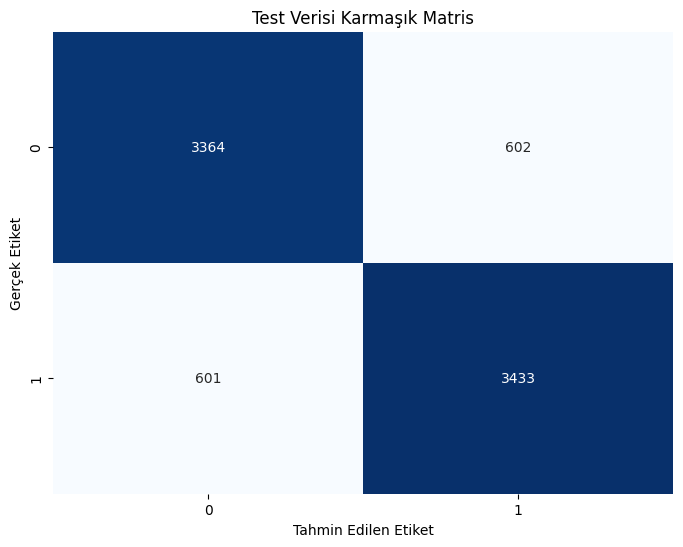

Doğruluk: 0.849625
Rapor:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3966
           1       0.85      0.85      0.85      4034

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



In [24]:
# Model performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Test Verisi Karmaşık Matris')
plt.show()

print("Doğruluk:", accuracy)
print("Rapor:")
print(report)